In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Téléchargement des données

In [2]:
#Merci chat gpt 

data = sc.read('../Data/matrix.mtx', var_names='../Data/genes.tsv', obs_names='../Data/barcodes.tsv')
#print(adata, '\n', type(adata), '\n', adata.shape)

data.var_names
#sc.read?

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2690', '2691', '2692', '2693', '2694', '2695', '2696', '2697', '2698',
       '2699'],
      dtype='object', length=2700)

In [3]:
adata = sc.read_h5ad('../Data/pbmc3k_raw.h5ad')
print(adata, '\n', type(adata), '\n', adata.shape)
adata.var_names

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids' 
 <class 'anndata._core.anndata.AnnData'> 
 (2700, 32738)


Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', name='index', length=32738)

In [4]:
adata.var.gene_ids

index
MIR1302-10      ENSG00000243485
FAM138A         ENSG00000237613
OR4F5           ENSG00000186092
RP11-34P13.7    ENSG00000238009
RP11-34P13.8    ENSG00000239945
                     ...       
AC145205.1      ENSG00000215635
BAGE5           ENSG00000268590
CU459201.1      ENSG00000251180
AC002321.2      ENSG00000215616
AC002321.1      ENSG00000215611
Name: gene_ids, Length: 32738, dtype: object

#### isoler les gènes mitochondriaux 
autre type de gèen ribo hemo ? 

In [5]:
# Isoler les gènes mitochondriaux
mito_genes = [gene for gene in adata.var_names if gene.startswith('MT-')]
mito_genes

['MT-ND1',
 'MT-ND2',
 'MT-CO1',
 'MT-CO2',
 'MT-ATP8',
 'MT-ATP6',
 'MT-CO3',
 'MT-ND3',
 'MT-ND4L',
 'MT-ND4',
 'MT-ND5',
 'MT-ND6',
 'MT-CYB']

In [6]:
# Créer une matrice de comptage uniquement pour les gènes mitochondriaux
counts_matrix = adata[:, mito_genes].X.toarray()
counts_matrix.shape

(2700, 13)

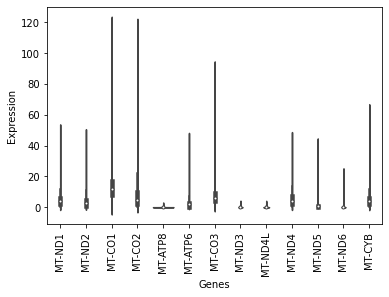

In [7]:
sns.violinplot(data=counts_matrix)
plt.xticks(rotation=90)
plt.xticks(range(len(mito_genes)), mito_genes)
plt.xlabel("Genes")
plt.ylabel("Expression")
plt.show()

 #### convertion en Dataframe (ça peut être utile)

In [8]:
# Conversion en dataframe Pandas
df = adata.to_df()
#df.info
#l'objet en dataframe ce comporte bizarement comme si il gardait en mémoire les lignes de commandes précédantes dans sont affichage

#### visualisation

In [9]:
print(adata.obs['sample'].value_counts())
adata

'\nsns.violinplot(data=df)\nplt.xticks(rotation=90)\nplt.xlabel("Genes")\nplt.ylabel("Expression")\nplt.show()\n'

In [20]:
test = adata
test

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

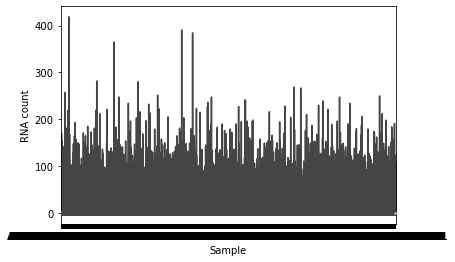

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir l'objet AnnData en dataframe pandas
counts_df = adata.to_df()

# Prendre une seule colonne représentant le compte de RNA par cellule
counts = counts_df

# Créer un violon plot
sns.violinplot(data=counts.T)

# Ajouter une étiquette d'abscisse
plt.xlabel("Sample")

# Ajouter une étiquette d'ordonnée
plt.ylabel("RNA count")

# Afficher le plot
plt.show()


In [18]:
# préparation des données à partir de l'objet AnnData
#counts = adata.X[:, 0] # sélectionnez uniquement le premier échantillon
counts = adata # convertit en séries pandas

# Création du violon plot
sns.violinplot(data=counts)
plt.xlabel("Sample")
plt.ylabel("Expression Count")
plt.show()


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

In [ ]:
# Guillaume pour faire des curseurs dynamiques
"""from ipywidgets import interact, fixed

def plot_graph(f, a, b, c):
    None

interact(
    plot_graph,
    f = fixed(f),
    a = (0,20,1),
    b = ["a", "bé", "cé"],
    c = (0,20,1)
)"""

#### Cleaning

In [25]:
sc.pp.filter_cells(adata, min_genes=200) #filtrage des cell en fonction de présence minimal (comptage) ici 200 gène compté pour une cellule -> goutte vide mais contaminé
#on ne peut pas ce servir des gènes trouver dans des gouttes "vides" pour clean encore les données la dessus
#mettre un max et définir les seuils min et max par observation des violon plots pour couper les queus


In [26]:
sc.pp.filter_genes(adata, min_cells=3) # filtre su les gènes si ils sont présent sur au moins 3 cellules ici

sc.pp.normalize_per_cell(adata) #normalisation avec les paramètres par défault
sc.pp.log1p(adata) #normalisation des valeurs par l'application d'un log nep sur les valerus peut être facultatif 
# ici facultatif comme on a retirer les zéros avec les filtres par seuil minimum pour les gènes et cellules 
print(adata)


AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_counts'
    var: 'gene_ids', 'n_cells'
    uns: 'log1p'


#### Visualization 

C:\ProgramData\Anaconda3\lib\site-packages\scanpy\preprocessing\_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)


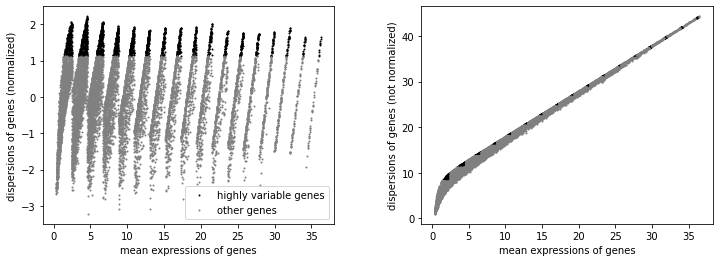

In [27]:

sc.pp.scale(adata) #normalisation centré réduite peut être facultatif

sc.pp.highly_variable_genes(adata, n_top_genes=2000)

sc.pl.highly_variable_genes(adata)

#### PCA

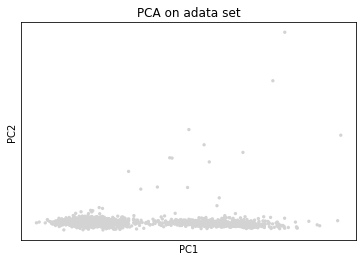

In [28]:

sc.tl.pca(adata)
sc.pl.pca(adata, colorbar_loc='right', title='PCA on adata set') #changer la forme du graphe avec les repères


In [29]:
#faire le graph des proches 
"""
# Clustering
sc.tl.louvain(adata)
sc.pl.umap(adata, color='louvain')

# UMAP
sc.tl.umap(adata)
sc.pl.umap(adata)
"""


"\n# Clustering\nsc.tl.louvain(adata)\nsc.pl.umap(adata, color='louvain')\n\n# UMAP\nsc.tl.umap(adata)\nsc.pl.umap(adata)\n"